In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Coding up a linear regression

$$ y=ax+b $$ 

- Unknowns are: a, b 
- so, $$\begin{align}
    \mathbf{m} &= \begin{bmatrix}
           a \\
           b
         \end{bmatrix}
  \end{align}$$

## Least square solution: 

$$ \mathbf{\tilde{m}} = (\mathbf{G}^T\mathbf{G})^{-1} \mathbf{G}^T\mathbf{d}^{obs}$$

In [3]:
df = pd.read_csv(
    "../co2/co2_mm_mlo.csv", 
    # skiprows=40,
    comment='#'
)
df = df[df['year']<1965]

In [4]:
df

,year,month,decimal date,average,deseasonalized,ndays,sdev,unc
0,1958,3,1958.2027,315.71,314.44,-1,-9.99,-0.99
1,1958,4,1958.2877,317.45,315.16,-1,-9.99,-0.99
2,1958,5,1958.3699,317.51,314.69,-1,-9.99,-0.99
3,1958,6,1958.4548,317.27,315.15,-1,-9.99,-0.99
4,1958,7,1958.5370,315.87,315.20,-1,-9.99,-0.99
...,...,...,...,...,...,...,...,...
77,1964,8,1964.6230,318.69,320.03,-1,-9.99,-0.99
78,1964,9,1964.7077,316.71,319.67,-1,-9.99,-0.99
79,1964,10,1964.7896,316.87,319.93,-1,-9.99,-0.99
80,1964,11,1964.8743,317.68,319.59,-1,-9.99,-0.99


In [5]:
df.head(3)

,year,month,decimal date,average,deseasonalized,ndays,sdev,unc
0,1958,3,1958.2027,315.71,314.44,-1,-9.99,-0.99
1,1958,4,1958.2877,317.45,315.16,-1,-9.99,-0.99
2,1958,5,1958.3699,317.51,314.69,-1,-9.99,-0.99


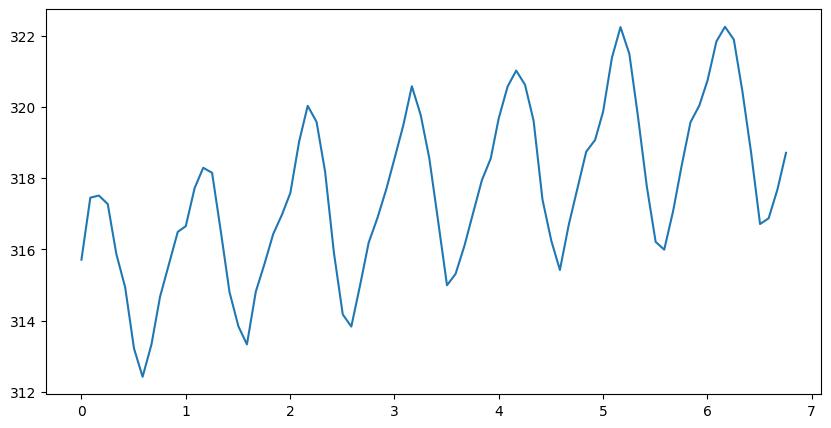

In [19]:
fig, ax = plt.subplots(1,1, figsize=(10, 5))
ax.plot(df['decimal date'].values, df['average'].values)
# ax.plot(df['decimal date'].values, df['deseasonalized'].values)
# ax.set_xlim(1960, 1965)
# ax.set_ylim(310, 330)

## Create a system: Gm = d

In [7]:
time = df['decimal date'].values
time-=time.min()


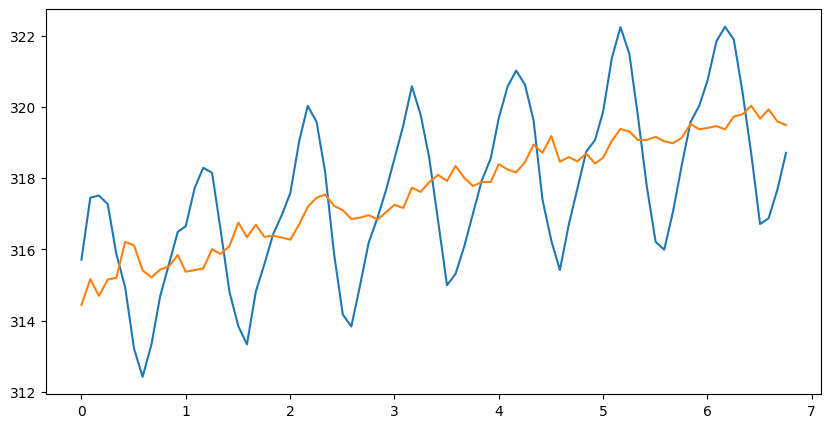

In [8]:
fig, ax = plt.subplots(1,1, figsize=(10, 5))
ax.plot(time, df['average'].values)
ax.plot(time, df['deseasonalized'].values)
# ax.set_xlim(1960, 1965)
# ax.set_ylim(310, 330)

In [9]:
nt = len(time)
e = np.ones(nt)


In [10]:
b = df['deseasonalized'].values[0]
a = 2.5

In [11]:
G = np.c_[time, e]
m = np.array([a, b])

In [12]:
d = G @ m
GtGinv = np.linalg.inv(G.T @ G)

In [13]:
m_est = np.linalg.solve(G.T @ G, G.T @ df['average'].values)

In [14]:
m_est = GtGinv @ (G.T @ df['average'].values )

In [15]:
m_est

array([  0.65344619, 315.39698845])

In [16]:
d_est = G @ m_est

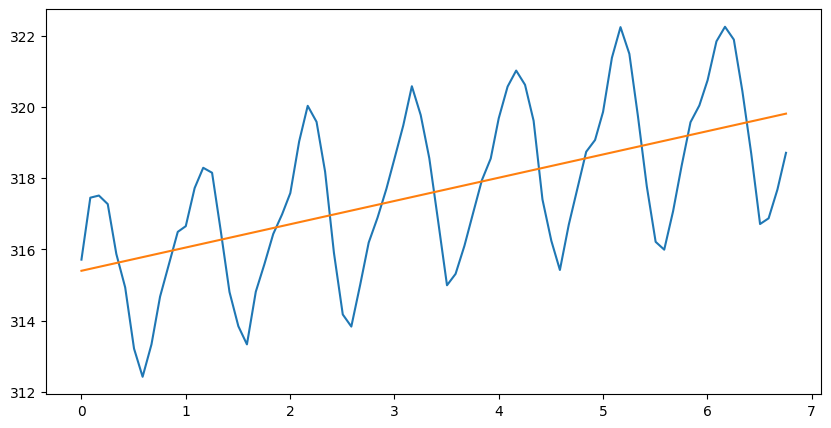

In [17]:
fig, ax = plt.subplots(1,1, figsize=(10, 5))
ax.plot(time, df['average'].values)
ax.plot(time, d_est)
# ax.set_xlim(1960, 1965)
# ax.set_ylim(310, 330)

In [18]:
m_synthetic = np.array([5, 300])

In [108]:
d_synthetic = G @ m_synthetic
d_synthetic[-1] = 1e3
noise = np.random.randn(len(d_synthetic)) * 7
d_obs = d_synthetic + noise

In [109]:
m_synthetic_est = GtGinv @ (G.T @ d_obs)


In [110]:
d_synthetic_pred = G @ m_synthetic_est

In [111]:
np.linalg.norm(d_synthetic_pred - d_obs)**2

434269.60986308026

In [112]:
r = d_synthetic_pred - d_obs
r = r.reshape([-1,1])
r.T.dot(r)

array([[434269.60986308]])

In [113]:
r.shape

(82, 1)

In [114]:
r.T.dot(r)

array([[434269.60986308]])

SyntaxError: invalid syntax (1382755417.py, line 1)

(250.0, 400.0)

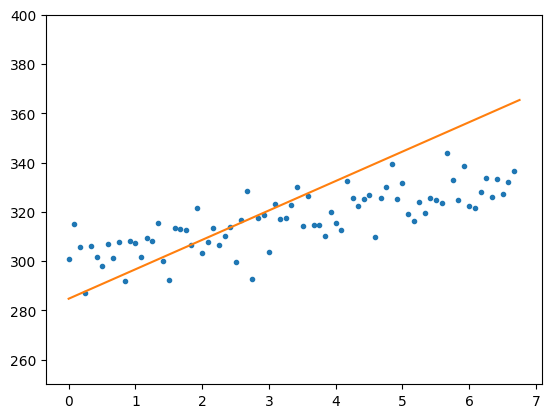

In [118]:
plt.plot(time, d_obs, '.')
plt.plot(time, d_synthetic_pred)
plt.ylim(250, 400)

In [59]:
# 1/12 * 3 - 1/12 * 0.5

In [58]:
# df['decimal date'].values